In [3]:
# 1. Configuração e Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [4]:
# 2. Carregamento dos Dados

# Primeiro, vamos fazer upload do arquivo para o Colab
from google.colab import files
import io

print("Por favor, faça o upload do arquivo listings.csv.gz")
uploaded = files.upload()

# Carregar o dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), compression='gzip')

print("Dataset carregado com sucesso!")

Por favor, faça o upload do arquivo listings.csv.gz


Saving listings.csv.gz to listings.csv.gz
Dataset carregado com sucesso!


In [5]:
# 3. Primeira Inspeção dos Dados

# Informações básicas do dataset
print("DIMENSÕES DO DATASET:")
print(f"Linhas: {df.shape[0]:,}")
print(f"Colunas: {df.shape[1]}")

print("\nPRIMEIRAS LINHAS:")
df.head()

DIMENSÕES DO DATASET:
Linhas: 42,572
Colunas: 79

PRIMEIRAS LINHAS:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40


In [6]:
# 4. Informações das Colunas
print("INFORMAÇÕES DAS COLUNAS:")
print(df.info())

print("\nESTATÍSTICAS DESCRITIVAS:")
df.describe()

INFORMAÇÕES DAS COLUNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42572 entries, 0 to 42571
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42572 non-null  int64  
 1   listing_url                                   42572 non-null  object 
 2   scrape_id                                     42572 non-null  int64  
 3   last_scraped                                  42572 non-null  object 
 4   source                                        42572 non-null  object 
 5   name                                          42572 non-null  object 
 6   description                                   41561 non-null  object 
 7   neighborhood_overview                         16513 non-null  object 
 8   picture_url                                   42572 non-null  object 
 9   host_id                             

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.257200e+04,4.257200e+04,4.257200e+04,41029.000000,41029.000000,0.0,42572.000000,42572.000000,42572.000000,38951.000000,...,33942.000000,33942.000000,33942.000000,33942.000000,0.0,42572.000000,42572.000000,42572.000000,42572.000000,33949.000000
mean,7.837189e+17,2.025062e+13,2.315791e+08,13.338639,23.894124,NaN,-22.965791,-43.247811,3.945222,1.486072,...,4.889382,4.881812,4.859590,4.724609,NaN,9.636428,8.766842,0.771023,0.094099,1.204918
std,5.521959e+17,8.964949e+00,2.152555e+08,45.864457,108.382540,NaN,0.035582,0.099906,2.284062,0.969512,...,0.299662,0.310770,0.308788,0.416477,NaN,25.660143,25.503866,2.041902,0.989824,1.266109
min,1.787800e+04,2.025062e+13,3.607000e+03,1.000000,1.000000,NaN,-23.072920,-43.723009,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.786936e+07,2.025062e+13,3.656636e+07,1.000000,1.000000,NaN,-22.984317,-43.297495,2.000000,1.000000,...,4.890000,4.880000,4.840000,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.280000
50%,9.993601e+17,2.025062e+13,1.550753e+08,2.000000,3.000000,NaN,-22.971540,-43.193571,4.000000,1.000000,...,4.990000,5.000000,4.960000,4.830000,NaN,2.000000,1.000000,0.000000,0.000000,0.780000
75%,1.284331e+18,2.025062e+13,4.253404e+08,7.000000,9.000000,NaN,-22.951207,-43.184550,5.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,4.000000,1.000000,0.000000,1.740000
max,1.450245e+18,2.025062e+13,7.030729e+08,847.000000,2309.000000,NaN,-22.750510,-43.104400,16.000000,20.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,226.000000,226.000000,20.000000,20.000000,15.390000


In [7]:
# 5. Análise de Valores Missing

# Análise de dados missing
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("DADOS MISSING POR COLUNA:")
missing_info = pd.DataFrame({
    'Coluna': df.columns,
    'Missing': missing_data,
    'Percentual (%)': missing_percent
})

# Ordenar pelas colunas com mais missing values
missing_info = missing_info[missing_info['Missing'] > 0].sort_values('Missing', ascending=False)
missing_info.head(15)

DADOS MISSING POR COLUNA:


,Coluna,Missing,Percentual (%)
license,license,42572,100.000000
calendar_updated,calendar_updated,42572,100.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,42572,100.000000
neighbourhood,neighbourhood,26059,61.211594
neighborhood_overview,neighborhood_overview,26059,61.211594
host_about,host_about,23175,54.437189
host_location,host_location,9848,23.132575
review_scores_checkin,review_scores_checkin,8630,20.271540
review_scores_value,review_scores_value,8630,20.271540
review_scores_location,review_scores_location,8630,20.271540


In [8]:
# 6. Análise da Variável Preço

print("ANÁLISE DA VARIÁVEL PREÇO:")

# Primeiro, vamos ver como a coluna price está formatada
print("\nPrimeiros valores da coluna price:")
print(df['price'].head(10))

# Converter preço para numérico (remover $, vírgulas e espaços)
df['price_clean'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

print(f"\nEstatísticas do preço:")
print(f"Preço médio: R$ {df['price_clean'].mean():.2f}")
print(f"Preço mediano: R$ {df['price_clean'].median():.2f}")
print(f"Preço mínimo: R$ {df['price_clean'].min():.2f}")
print(f"Preço máximo: R$ {df['price_clean'].max():.2f}")
print(f"Desvio padrão: R$ {df['price_clean'].std():.2f}")

# Verificar quantos valores missing temos na coluna price
print(f"\nValores missing na coluna price: {df['price'].isnull().sum()}")

ANÁLISE DA VARIÁVEL PREÇO:

Primeiros valores da coluna price:
0      $254.00
1      $252.00
2      $190.00
3    $2,239.00
4      $743.00
5      $189.00
6    $2,800.00
7      $201.00
8      $159.00
9      $350.00
Name: price, dtype: object

Estatísticas do preço:
Preço médio: R$ 688.01
Preço mediano: R$ 311.00
Preço mínimo: R$ 34.00
Preço máximo: R$ 500000.00
Desvio padrão: R$ 3758.45

Valores missing na coluna price: 3580


ANÁLISE DE DISTRIBUIÇÃO E OUTLIERS:

Percentis dos preços:
Percentil 0%: R$ 34.00
Percentil 1%: R$ 72.00
Percentil 5%: R$ 112.00
Percentil 10%: R$ 141.00
Percentil 25%: R$ 200.00
Percentil 50%: R$ 311.00
Percentil 75%: R$ 558.00
Percentil 90%: R$ 1,080.00
Percentil 95%: R$ 1,800.00
Percentil 99%: R$ 6,130.84
Percentil 100%: R$ 500,000.00

Imóveis acima de R$ 10.000: 197
Imóveis acima de R$ 5.000: 509
Imóveis acima de R$ 2.000: 1614


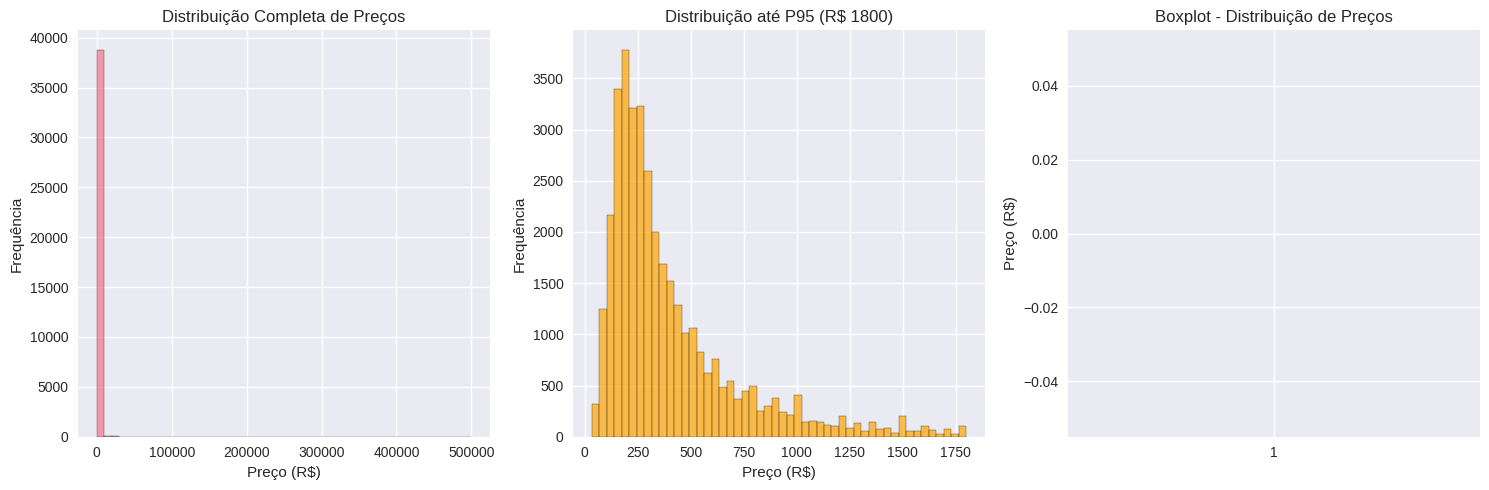

In [9]:
# 7. Análise de Distribuição e Outliers

print("ANÁLISE DE DISTRIBUIÇÃO E OUTLIERS:")

# Calcular percentis para entender a distribuição
print("\nPercentis dos preços:")
percentis = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
for p in percentis:
    valor = df['price_clean'].quantile(p/100)
    print(f"Percentil {p}%: R$ {valor:,.2f}")

# Identificar quantos imóveis estão em faixas de preço extremas
print(f"\nImóveis acima de R$ 10.000: {(df['price_clean'] > 10000).sum()}")
print(f"Imóveis acima de R$ 5.000: {(df['price_clean'] > 5000).sum()}")
print(f"Imóveis acima de R$ 2.000: {(df['price_clean'] > 2000).sum()}")

# Vamos criar uma visualização da distribuição
plt.figure(figsize=(15, 5))

# Gráfico 1: Distribuição completa (com outliers)
plt.subplot(1, 3, 1)
plt.hist(df['price_clean'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuição Completa de Preços')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')

# Gráfico 2: Zoom até o percentil 95
plt.subplot(1, 3, 2)
price_95 = df['price_clean'].quantile(0.95)
df_filtered = df[df['price_clean'] <= price_95]
plt.hist(df_filtered['price_clean'], bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.title(f'Distribuição até P95 (R$ {price_95:.0f})')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')

# Gráfico 3: Boxplot para identificar outliers
plt.subplot(1, 3, 3)
plt.boxplot(df['price_clean'])
plt.title('Boxplot - Distribuição de Preços')
plt.ylabel('Preço (R$)')

plt.tight_layout()
plt.show()

ANÁLISE POR TIPO DE IMÓVEL:

Distribuição por room_type:
room_type
Entire home/apt    33990
Private room        8152
Shared room          407
Hotel room            23
Name: count, dtype: int64

Distribuição por property_type:
property_type
Entire rental unit                   27839
Private room in rental unit           4929
Entire home                           2079
Entire condo                          1812
Private room in home                  1489
Entire loft                            833
Entire serviced apartment              763
Room in hotel                          417
Private room in bed and breakfast      406
Private room in condo                  359
Name: count, dtype: int64


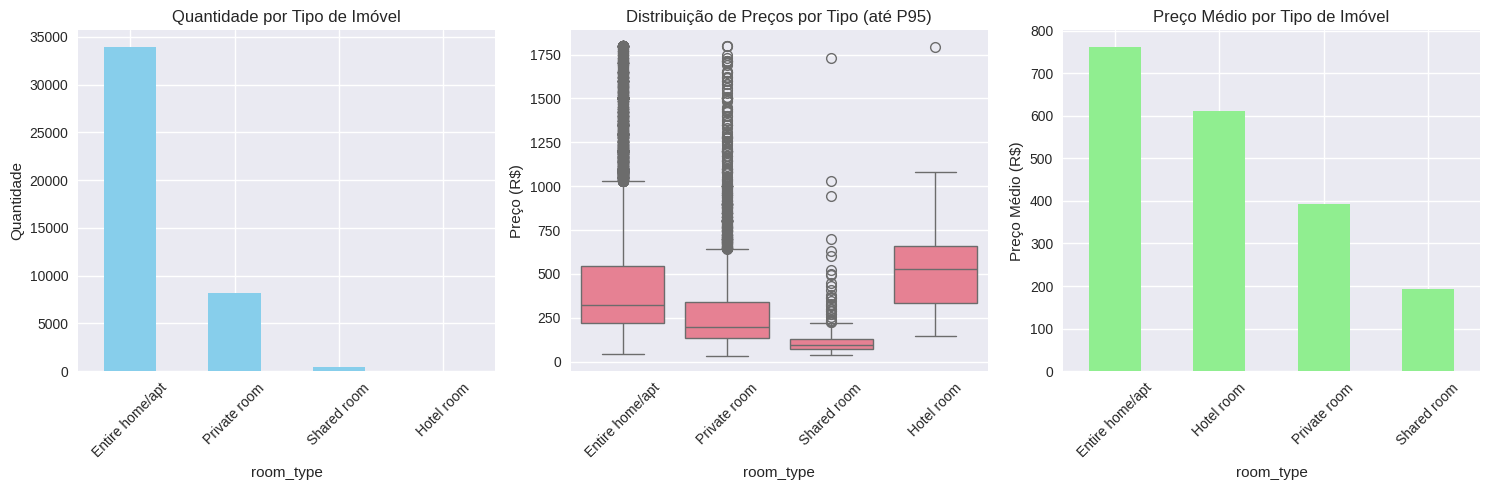


Estatísticas de preço por room_type:
                   count        mean          std    min     25%    50%  \
room_type                                                                 
Entire home/apt  31363.0  762.347001  3863.887571   43.0  224.00  345.0   
Hotel room          13.0  610.230769   438.472947  144.0  335.00  528.0   
Private room      7244.0  391.666621  3347.925434   34.0  138.00  204.0   
Shared room        372.0  194.112903  1133.509108   40.0   71.75   95.5   

                    75%       max  
room_type                          
Entire home/apt  618.00  500000.0  
Hotel room       661.00    1793.0  
Private room     350.00  225000.0  
Shared room      132.75   21686.0  


In [10]:
# 8. Análise por Tipo de Imóvel

print("ANÁLISE POR TIPO DE IMÓVEL:")

# Distribuição dos tipos de imóvel
print("\nDistribuição por room_type:")
room_type_counts = df['room_type'].value_counts()
print(room_type_counts)

print("\nDistribuição por property_type:")
property_type_counts = df['property_type'].value_counts()
print(property_type_counts.head(10))  # Mostrar apenas os 10 mais comuns

# Vamos criar visualizações
plt.figure(figsize=(15, 5))

# Gráfico 1: Quantidade por tipo de imóvel
plt.subplot(1, 3, 1)
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Quantidade por Tipo de Imóvel')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')

# Gráfico 2: Distribuição de preços por tipo de imóvel (até P95 para melhor visualização)
plt.subplot(1, 3, 2)
df_filtered = df[df['price_clean'] <= df['price_clean'].quantile(0.95)]
sns.boxplot(data=df_filtered, x='room_type', y='price_clean')
plt.title('Distribuição de Preços por Tipo (até P95)')
plt.xticks(rotation=45)
plt.ylabel('Preço (R$)')

# Gráfico 3: Preço médio por tipo de imóvel
plt.subplot(1, 3, 3)
price_by_room = df.groupby('room_type')['price_clean'].mean().sort_values(ascending=False)
price_by_room.plot(kind='bar', color='lightgreen')
plt.title('Preço Médio por Tipo de Imóvel')
plt.xticks(rotation=45)
plt.ylabel('Preço Médio (R$)')

plt.tight_layout()
plt.show()

# Estatísticas detalhadas por tipo de imóvel
print("\nEstatísticas de preço por room_type:")
print(df.groupby('room_type')['price_clean'].describe())

ANÁLISE GEOGRÁFICA POR BAIRROS:

Colunas relacionadas a localização:
host_neighbourhood: 591 valores únicos
neighbourhood: 252 valores únicos
neighbourhood_cleansed: 154 valores únicos
neighbourhood_group_cleansed: 0 valores únicos

Top 10 bairros com mais imóveis:
neighbourhood_cleansed
Copacabana                  13099
Barra da Tijuca              3682
Ipanema                      3615
Centro                       2140
Recreio dos Bandeirantes     2109
Botafogo                     1870
Jacarepaguá                  1862
Leblon                       1850
Santa Teresa                 1504
Flamengo                      967
Name: count, dtype: int64

Preço médio por bairro (apenas bairros com ≥100 imóveis):
                       price_clean                  latitude longitude
                             count     mean  median     mean      mean
neighbourhood_cleansed                                                
Joá                            155  6185.97  5000.0   -23.01    -43.29
Sã

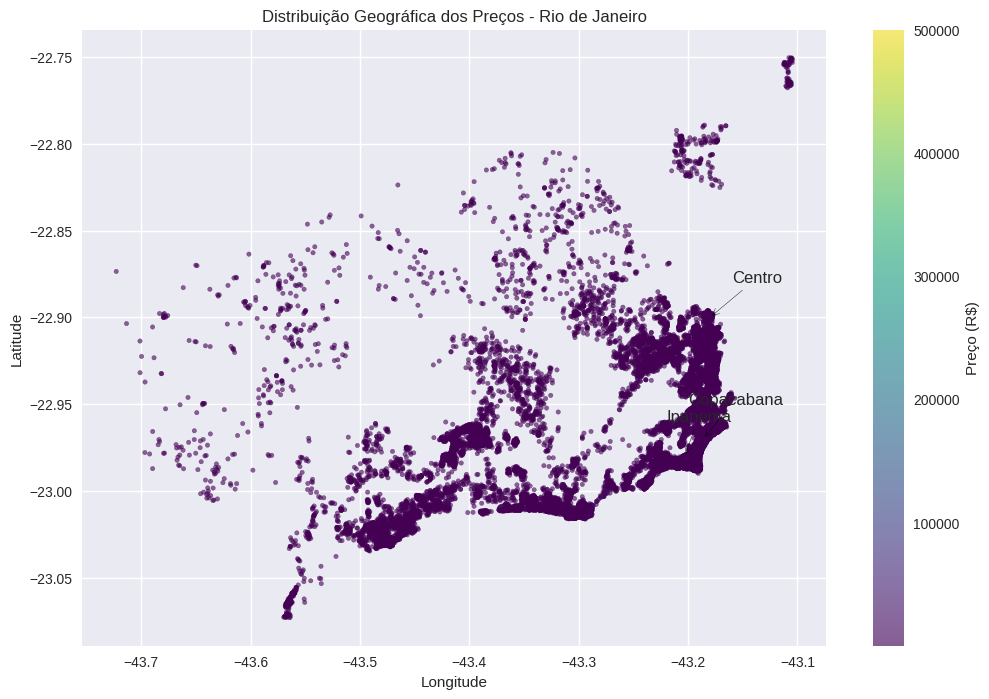


Total de bairros únicos: 154
Bairros com pelo menos 100 imóveis: 37


In [11]:
# 9. Análise Geográfica por Bairros

print("ANÁLISE GEOGRÁFICA POR BAIRROS:")

# Verificar qual coluna de bairro usar
print("\nColunas relacionadas a localização:")
location_cols = [col for col in df.columns if 'neighbourhood' in col.lower()]
for col in location_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} valores únicos")

# Vamos usar neighbourhood_cleansed (mais completa)
print(f"\nTop 10 bairros com mais imóveis:")
top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().head(10)
print(top_neighbourhoods)

# Análise de preços por bairro (apenas bairros com pelo menos 100 imóveis)
print(f"\nPreço médio por bairro (apenas bairros com ≥100 imóveis):")
neighbourhood_stats = df.groupby('neighbourhood_cleansed').agg({
    'price_clean': ['count', 'mean', 'median'],
    'latitude': 'mean',
    'longitude': 'mean'
}).round(2)

# Filtrar bairros com pelo menos 100 imóveis
neighbourhood_stats = neighbourhood_stats[neighbourhood_stats[('price_clean', 'count')] >= 100]
neighbourhood_stats = neighbourhood_stats.sort_values(('price_clean', 'mean'), ascending=False)

print(neighbourhood_stats.head(10))

# Vamos criar um mapa de calor básico dos preços
plt.figure(figsize=(12, 8))

# Scatter plot geográfico
plt.scatter(df['longitude'], df['latitude'],
           c=df['price_clean'],
           cmap='viridis',
           alpha=0.6,
           s=10)
plt.colorbar(label='Preço (R$)')
plt.title('Distribuição Geográfica dos Preços - Rio de Janeiro')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicionar alguns pontos de referência
plt.annotate('Copacabana', xy=(-43.186, -22.97), xytext=(-43.2, -22.95),
             arrowprops=dict(arrowstyle='->'), fontsize=12)
plt.annotate('Ipanema', xy=(-43.203, -22.98), xytext=(-43.22, -22.96),
             arrowprops=dict(arrowstyle='->'), fontsize=12)
plt.annotate('Centro', xy=(-43.18, -22.90), xytext=(-43.16, -22.88),
             arrowprops=dict(arrowstyle='->'), fontsize=12)

plt.show()

print(f"\nTotal de bairros únicos: {df['neighbourhood_cleansed'].nunique()}")
print(f"Bairros com pelo menos 100 imóveis: {len(neighbourhood_stats)}")

ANÁLISE DE CAPACIDADE E COMODIDADES:

Estatísticas de capacidade:
count    42572.000000
mean         3.945222
std          2.284062
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
Name: accommodates, dtype: float64


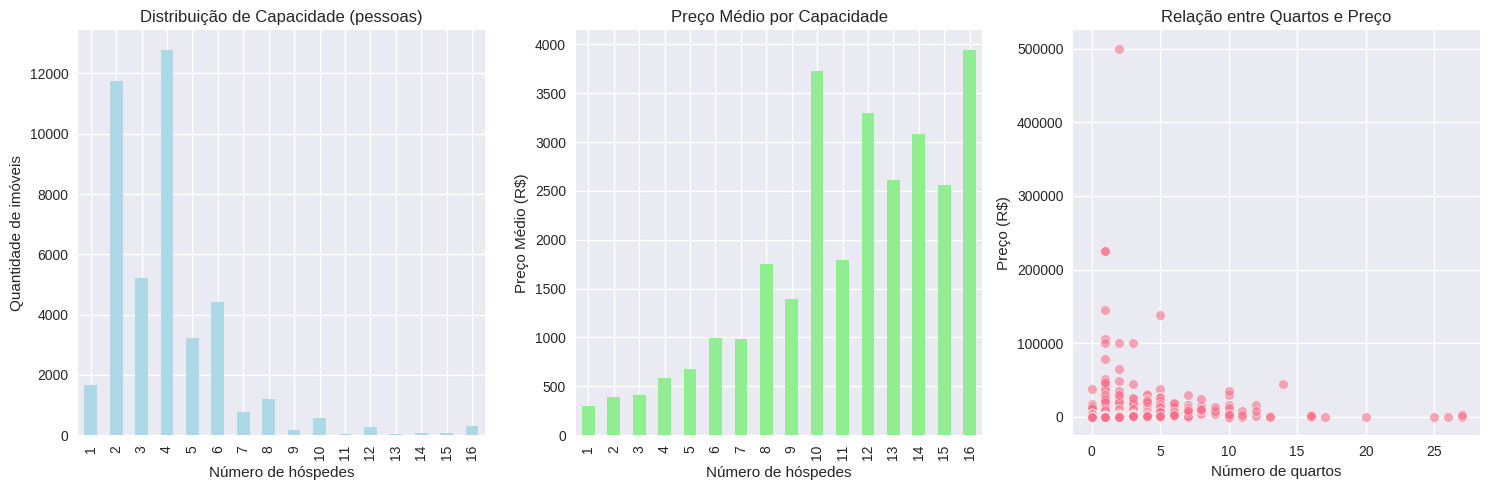


Dados sobre quartos:
Valores missing em bedrooms: 736
Valores missing em beds: 3591

Distribuição de quartos:
bedrooms
0.0     1642
1.0    24895
2.0    10017
3.0     3910
4.0      826
5.0      330
6.0      120
7.0       44
8.0       15
9.0        4
Name: count, dtype: int64

Análise de comodidades (amostra dos primeiros 5 imóveis):
0    ["Oven", "Building staff", "TV with standard c...
1    ["Window AC unit", "Room-darkening shades", "D...
2    ["Building staff", "Bed linens", "Heating", "P...
3    ["Pack \u2019n play/Travel crib", "Private pat...
4    ["Microwave", "Dedicated workspace", "Hot wate...
Name: amenities, dtype: object

Presença de comodidades específicas:
Wi-Fi: 0 imóveis (0.0%)
wifi: 40829 imóveis (95.9%)
WiFi: 40829 imóveis (95.9%)
Internet: 0 imóveis (0.0%)
Ar condicionado: 3 imóveis (0.0%)
ar condicionado: 3 imóveis (0.0%)
AC: 31954 imóveis (75.1%)
Pool: 10209 imóveis (24.0%)
piscina: 0 imóveis (0.0%)
Estacionamento: 0 imóveis (0.0%)
parking: 25212 imóveis (59.2%)
Va

In [12]:
# 10. Análise de Capacidade e Comodidades

print("ANÁLISE DE CAPACIDADE E COMODIDADES:")

# Análise da capacidade dos imóveis
print("\nEstatísticas de capacidade:")
print(df['accommodates'].describe())

# Relação entre capacidade e preço
plt.figure(figsize=(15, 5))

# Gráfico 1: Distribuição de capacidade
plt.subplot(1, 3, 1)
df['accommodates'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Distribuição de Capacidade (pessoas)')
plt.xlabel('Número de hóspedes')
plt.ylabel('Quantidade de imóveis')

# Gráfico 2: Preço médio por capacidade
plt.subplot(1, 3, 2)
price_by_accommodates = df.groupby('accommodates')['price_clean'].mean()
price_by_accommodates.plot(kind='bar', color='lightgreen')
plt.title('Preço Médio por Capacidade')
plt.xlabel('Número de hóspedes')
plt.ylabel('Preço Médio (R$)')

# Gráfico 3: Quartos e camas
plt.subplot(1, 3, 3)
# Usar apenas dados não nulos para bedrooms
bedrooms_data = df[df['bedrooms'].notnull()]
sns.scatterplot(data=bedrooms_data, x='bedrooms', y='price_clean', alpha=0.6)
plt.title('Relação entre Quartos e Preço')
plt.xlabel('Número de quartos')
plt.ylabel('Preço (R$)')

plt.tight_layout()
plt.show()

# Análise de quartos e camas
print(f"\nDados sobre quartos:")
print(f"Valores missing em bedrooms: {df['bedrooms'].isnull().sum()}")
print(f"Valores missing em beds: {df['beds'].isnull().sum()}")

if df['bedrooms'].notnull().sum() > 0:
    print(f"\nDistribuição de quartos:")
    print(df['bedrooms'].value_counts().sort_index().head(10))

# Análise de comodidades mais comuns
print(f"\nAnálise de comodidades (amostra dos primeiros 5 imóveis):")
print(df['amenities'].head())

# Vamos contar algumas comodidades específicas
comodidades_interesse = ['Wi-Fi', 'wifi', 'WiFi', 'Internet', 'Ar condicionado', 'ar condicionado',
                        'AC', 'Pool', 'piscina', 'Estacionamento', 'parking', 'Varanda', 'varanda']

print(f"\nPresença de comodidades específicas:")
for comodidade in comodidades_interesse:
    count = df['amenities'].str.contains(comodidade, case=False, na=False).sum()
    print(f"{comodidade}: {count} imóveis ({count/len(df)*100:.1f}%)")

ANÁLISE DE AVALIAÇÕES E REVIEWS:

Estatísticas das avaliações:
       number_of_reviews  review_scores_rating  reviews_per_month
count       42572.000000          33949.000000       33949.000000
mean           25.116908              4.806461           1.204918
std            47.330774              0.374518           1.266109
min             0.000000              0.000000           0.010000
25%             1.000000              4.760000           0.280000
50%             7.000000              4.920000           0.780000
75%            28.000000              5.000000           1.740000
max           744.000000              5.000000          15.390000


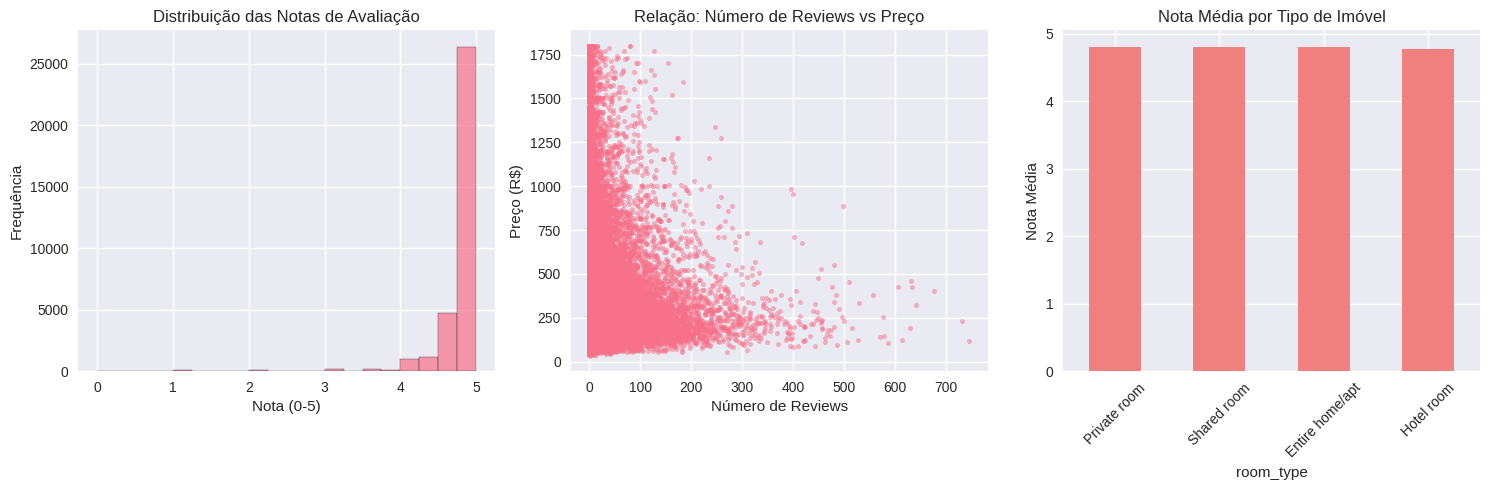


Análise de Superhosts:
Total de superhosts: 13936
Percentual de superhosts: 32.7%

Comparação Superhost vs Não-Superhost:
                  price_clean        review_scores_rating number_of_reviews
                         mean median                 mean              mean
host_is_superhost                                                          
f                      724.05  338.0                 4.75             13.23
t                      599.71  279.0                 4.89             47.13


In [13]:
# 11. Análise de Avaliações e Reviews

print("ANÁLISE DE AVALIAÇÕES E REVIEWS:")

# Análise geral das avaliações
review_cols = ['number_of_reviews', 'review_scores_rating', 'reviews_per_month']
print("\nEstatísticas das avaliações:")
print(df[review_cols].describe())

# Relação entre avaliações e preço
plt.figure(figsize=(15, 5))

# Gráfico 1: Distribuição das notas de avaliação
plt.subplot(1, 3, 1)
df_clean_reviews = df[df['review_scores_rating'].notnull()]
plt.hist(df_clean_reviews['review_scores_rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribuição das Notas de Avaliação')
plt.xlabel('Nota (0-5)')
plt.ylabel('Frequência')

# Gráfico 2: Relação entre número de reviews e preço
plt.subplot(1, 3, 2)
df_filtered = df[df['price_clean'] <= df['price_clean'].quantile(0.95)]
plt.scatter(df_filtered['number_of_reviews'], df_filtered['price_clean'], alpha=0.5, s=10)
plt.title('Relação: Número de Reviews vs Preço')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço (R$)')

# Gráfico 3: Nota média por tipo de imóvel
plt.subplot(1, 3, 3)
review_by_room = df.groupby('room_type')['review_scores_rating'].mean().sort_values(ascending=False)
review_by_room.plot(kind='bar', color='lightcoral')
plt.title('Nota Média por Tipo de Imóvel')
plt.xticks(rotation=45)
plt.ylabel('Nota Média')

plt.tight_layout()
plt.show()

# Análise de superhosts
print(f"\nAnálise de Superhosts:")
print(f"Total de superhosts: {df['host_is_superhost'].value_counts().get('t', 0)}")
print(f"Percentual de superhosts: {df['host_is_superhost'].value_counts().get('t', 0)/len(df)*100:.1f}%")

if 'host_is_superhost' in df.columns:
    superhost_stats = df.groupby('host_is_superhost').agg({
        'price_clean': ['mean', 'median'],
        'review_scores_rating': 'mean',
        'number_of_reviews': 'mean'
    }).round(2)
    print(f"\nComparação Superhost vs Não-Superhost:")
    print(superhost_stats)

In [14]:
# 12. Resumo Final e Insights

print("=" * 80)
print("RESUMO DA ANÁLISE - AIRBNB RIO DE JANEIRO")
print("=" * 80)

print("\nVISÃO GERAL DO MERCADO:")
print(f"• Total de imóveis analisados: {len(df):,}")
print(f"• Preço médio: R$ {df['price_clean'].mean():.2f}")
print(f"• Preço mediano: R$ {df['price_clean'].median():.2f}")
print(f"• Faixa de preço predominante: R$ {df['price_clean'].quantile(0.25):.0f} - R$ {df['price_clean'].quantile(0.75):.0f}")

print("\nDISTRIBUIÇÃO POR TIPO DE IMÓVEL:")
for room_type, count in room_type_counts.items():
    percent = (count / len(df)) * 100
    avg_price = df[df['room_type'] == room_type]['price_clean'].mean()
    print(f"• {room_type}: {count:,} imóveis ({percent:.1f}%) - Preço médio: R$ {avg_price:.0f}")

print("\nTOP 5 BAIRROS MAIS CAROS (com ≥100 imóveis):")
for i, (bairro, row) in enumerate(neighbourhood_stats.head(5).iterrows(), 1):
    count = row[('price_clean', 'count')]
    mean_price = row[('price_clean', 'mean')]
    median_price = row[('price_clean', 'median')]
    print(f"{i}. {bairro}: {count} imóveis - Média: R$ {mean_price:.0f} - Mediana: R$ {median_price:.0f}")

print("\nFATORES QUE IMPACTAM O PREÇO:")
print(f"• Capacidade média: {df['accommodates'].mean():.1f} pessoas")
print(f"• Quartos mais comuns: 1 quarto ({df[df['bedrooms'] == 1].shape[0]:,} imóveis)")
print(f"• Comodidades mais populares:")
print(f"  - Wi-Fi: {df['amenities'].str.contains('wifi', case=False, na=False).sum():,} imóveis ({(df['amenities'].str.contains('wifi', case=False, na=False).sum()/len(df))*100:.1f}%)")
print(f"  - Ar condicionado: {df['amenities'].str.contains('AC', case=False, na=False).sum():,} imóveis ({(df['amenities'].str.contains('AC', case=False, na=False).sum()/len(df))*100:.1f}%)")
print(f"  - Estacionamento: {df['amenities'].str.contains('parking', case=False, na=False).sum():,} imóveis ({(df['amenities'].str.contains('parking', case=False, na=False).sum()/len(df))*100:.1f}%)")
print(f"  - Piscina: {df['amenities'].str.contains('Pool', case=False, na=False).sum():,} imóveis ({(df['amenities'].str.contains('Pool', case=False, na=False).sum()/len(df))*100:.1f}%)")

print("\nDESEMPENHO E AVALIAÇÕES:")
print(f"• Nota média geral: {df['review_scores_rating'].mean():.2f}/5.0")
print(f"• Superhosts: {df['host_is_superhost'].value_counts().get('t', 0):,} ({df['host_is_superhost'].value_counts().get('t', 0)/len(df)*100:.1f}%)")
print(f"• Reviews por mês (média): {df['reviews_per_month'].mean():.2f}")

print("\nINSIGHTS PRINCIPAIS:")
print("1. MERCADO BIFURCADO: Grande diferença entre preço médio (R$ 688) e mediano (R$ 311)")
print("2. CONCENTRAÇÃO GEOGRÁFICA: Copacabana domina com 31% dos imóveis")
print("3. LUXO CONCENTRADO: Bairros como Joá e São Conrado têm preços 8x maiores que a mediana")
print("4. TIPOLOGIA PREDOMINANTE: Apartamentos/casas inteiras representam 80% do mercado")
print("5. COMODIDADES BÁSICAS: Wi-Fi presente em 96% dos imóveis, ar condicionado em 75%")

print("\nRECOMENDAÇÕES PARA ANFITRIÕES:")
print("• Precificar competitivamente: Focar na mediana de R$ 311, não na média")
print("• Investir em comodidades essenciais: Wi-Fi e ar condicionado são esperados")
print("• Buscar superhost: Aumenta visibilidade e número de reviews")
print("• Considerar localização: Bairros menos saturados podem oferecer melhor custo-benefício")

print(f"\nPRÓXIMOS PASSOS PARA ANÁLISE:")
print("1. Análise sazonalidade e disponibilidade")
print("2. Segmentação por público-alvo (família, casal, trabalho)")
print("3. Análise de concorrência por bairro")
print("4. Modelo preditivo de preços")

RESUMO DA ANÁLISE - AIRBNB RIO DE JANEIRO

VISÃO GERAL DO MERCADO:
• Total de imóveis analisados: 42,572
• Preço médio: R$ 688.01
• Preço mediano: R$ 311.00
• Faixa de preço predominante: R$ 200 - R$ 558

DISTRIBUIÇÃO POR TIPO DE IMÓVEL:
• Entire home/apt: 33,990 imóveis (79.8%) - Preço médio: R$ 762
• Private room: 8,152 imóveis (19.1%) - Preço médio: R$ 392
• Shared room: 407 imóveis (1.0%) - Preço médio: R$ 194
• Hotel room: 23 imóveis (0.1%) - Preço médio: R$ 610

TOP 5 BAIRROS MAIS CAROS (com ≥100 imóveis):
1. Joá: 155.0 imóveis - Média: R$ 6186 - Mediana: R$ 5000
2. São Conrado: 364.0 imóveis - Média: R$ 2548 - Mediana: R$ 754
3. Itanhangá: 179.0 imóveis - Média: R$ 2457 - Mediana: R$ 352
4. Lagoa: 264.0 imóveis - Média: R$ 1350 - Mediana: R$ 630
5. Gávea: 220.0 imóveis - Média: R$ 1044 - Mediana: R$ 450

FATORES QUE IMPACTAM O PREÇO:
• Capacidade média: 3.9 pessoas
• Quartos mais comuns: 1 quarto (24,895 imóveis)
• Comodidades mais populares:
  - Wi-Fi: 40,829 imóveis (95.9%)
  